<a href="https://colab.research.google.com/github/Jonny-T87/Dojo-Work/blob/main/Neural_Network_Kaggle_Exercise_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Neural Network Kaggle Exercise (Core)

Jonny Tesfahun
- 08/02/22

Required Task:

1. Be sure to perform a train test split on the train.csv so you can evaluate your models

2. Create and evaluate 3 iterations of a deep learning model to predict housing prices using the techniques you have learned to optimize your model's performance.  Be sure to include some form of regularization with at least one model

3. Select your best model!

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
# Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
 
# Sci-kit learn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [41]:
# Learning history plotting function from learn platform for plotting multiple metrics
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

In [42]:
df = pd.read_csv('/content/drive/MyDrive/DojoBootCamp/Project Files/Kaggle/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##Analyzing and Cleaning Data

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [44]:
df.duplicated().sum()

0

In [45]:
print(df.isna().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [46]:
df = df.drop(columns=['Alley','PoolQC','Fence','MiscFeature'])

In [47]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Train Test Split and Transform Data

In [48]:
X = df.drop(columns='SalePrice')
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [49]:
scaler = MinMaxScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [50]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [51]:
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

In [52]:
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe)

num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [53]:
preprocessing = make_column_transformer(num_tuple, cat_tuple)
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f081c0b13d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f081c0b1190>)])

In [54]:
preprocessing.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f081c0b13d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f081c0b1190>)])

In [55]:
X_train_processed = preprocessing.transform(X_train)
X_test_processed = preprocessing.transform(X_test)

In [56]:
#Checking to see cat and num are transformed, looks good 
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (1095, 272)




array([[0.70116518, 0.58823529, 0.07534247, ..., 0.        , 1.        ,
        0.        ],
       [0.55517478, 0.        , 0.19520548, ..., 0.        , 1.        ,
        0.        ],
       [0.94859493, 0.17647059, 0.13356164, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.88690884, 0.        , 0.13356164, ..., 0.        , 1.        ,
        0.        ],
       [0.58944483, 0.17647059, 0.11643836, ..., 0.        , 1.        ,
        0.        ],
       [0.77176148, 0.58823529, 0.10958904, ..., 0.        , 1.        ,
        0.        ]])

## 1st Model:

In [57]:
##1st Model shape
input_shape = X_train_processed.shape[1]
input_shape

272

In [58]:
#1st model
A_model = Sequential()

In [59]:
#input
A_model.add(Dense(272, input_dim= input_shape, activation= 'relu'))
#hidden layers
A_model.add(Dense(170, activation='relu'))
A_model.add(Dense(70, activation='relu'))
#output
A_model.add(Dense(1, activation='linear'))

In [60]:
#printing summary
print(A_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 272)               74256     
                                                                 
 dense_13 (Dense)            (None, 170)               46410     
                                                                 
 dense_14 (Dense)            (None, 70)                11970     
                                                                 
 dense_15 (Dense)            (None, 1)                 71        
                                                                 
Total params: 132,707
Trainable params: 132,707
Non-trainable params: 0
_________________________________________________________________
None


In [61]:
#compiling model, with lose using MSE since regression model, oprimizer is adam, and metrics MSE, RMSE

A_model.compile(loss='mse', optimizer='adam', metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

In [62]:
#fitting model with verbose to 0, so process isn't shown
history = A_model.fit(X_train_processed, y_train, validation_data= (X_test_processed, y_test), epochs=15, verbose=0)

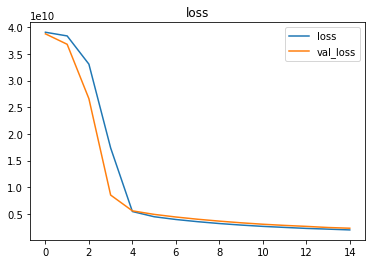

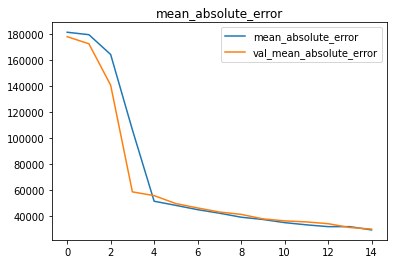

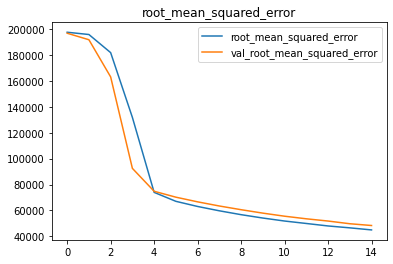

In [63]:
# plot metrics
 
plot_history(history)

In [64]:
# evaluating models
 
y_pred = A_model.predict(X_test_processed)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

final RMSE: 48326.13798820448
final MAE: 29690.889394263697
final R2: 0.6666220440231538


## 2nd Model:

In [65]:
#2nd model w/ dropout 20%
B_model = Sequential()

In [66]:
#input
B_model.add(Dense(272, input_dim= input_shape, activation= 'relu'))
#hidden layer
B_model.add(Dense(170, activation='relu'))
#first dropout
B_model.add(Dropout(0.2))
#hidden layer
B_model.add(Dense(70, activation='relu'))
#second dropout
B_model.add(Dropout(0.2))
#output
B_model.add(Dense(1, activation='linear'))

In [67]:
#printing summary model B
print(B_model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 272)               74256     
                                                                 
 dense_17 (Dense)            (None, 170)               46410     
                                                                 
 dropout_4 (Dropout)         (None, 170)               0         
                                                                 
 dense_18 (Dense)            (None, 70)                11970     
                                                                 
 dropout_5 (Dropout)         (None, 70)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 71        
                                                                 
Total params: 132,707
Trainable params: 132,707
Non-tr

In [68]:
#compiling
B_model.compile(loss='mse', optimizer='adam', metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

In [69]:
#fitting model B
history_B = B_model.fit(X_train_processed, y_train, validation_data= (X_test_processed, y_test), epochs=15, verbose=0)

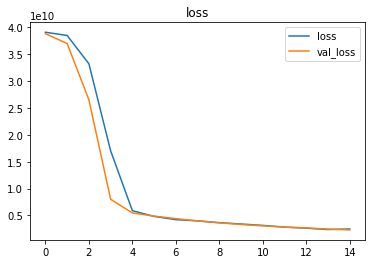

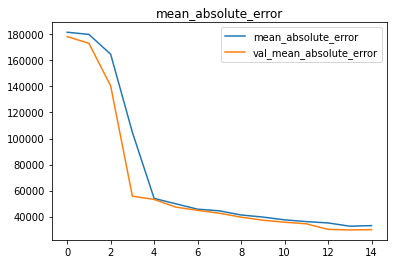

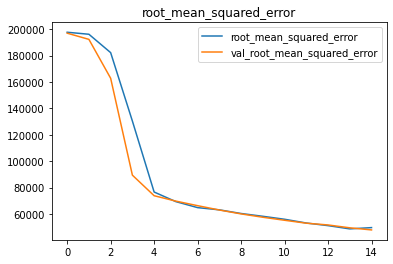

In [70]:
# plot metrics model B
 
plot_history(history_B)

In [71]:
# evaluating models
 
y_pred_B = B_model.predict(X_test_processed)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_B))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred_B)}')
print(f'final R2: {r2_score(y_test, y_pred_B)}')

final RMSE: 48000.59360438031
final MAE: 29939.356913527397
final R2: 0.6710984527365756


## Model 3:

In [72]:
#3rd model w/ dropout and early stopping & dropout 10%
C_model = Sequential()

In [73]:
#input
C_model.add(Dense(272, input_dim= input_shape, activation= 'relu'))
#hidden layer
C_model.add(Dense(170, activation='relu'))
#first dropout
C_model.add(Dropout(0.2))
#hidden layer
C_model.add(Dense(70, activation='relu'))
#second dropout
C_model.add(Dropout(0.2))
#output
C_model.add(Dense(1, activation='linear'))

In [74]:
#printing summary of model C
print(C_model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 272)               74256     
                                                                 
 dense_21 (Dense)            (None, 170)               46410     
                                                                 
 dropout_6 (Dropout)         (None, 170)               0         
                                                                 
 dense_22 (Dense)            (None, 70)                11970     
                                                                 
 dropout_7 (Dropout)         (None, 70)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 71        
                                                                 
Total params: 132,707
Trainable params: 132,707
Non-tr

In [75]:
#compiling w/ model 3
C_model.compile(loss='mse', optimizer='adam', metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

In [76]:
#fitting model C
early_stopping = EarlyStopping(patience=5)
history_C = C_model.fit(X_train_processed, y_train, validation_data= (X_test_processed, y_test), epochs=15, verbose=0, callbacks=[early_stopping])

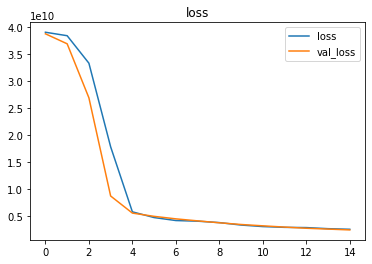

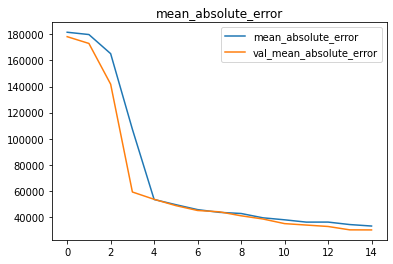

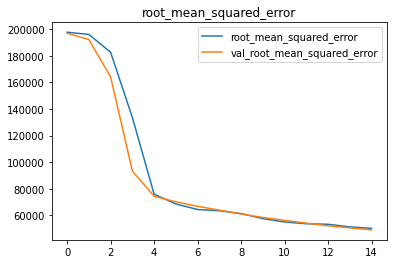

In [77]:
# plot metrics model C
 
plot_history(history_C)

In [78]:
# evaluating model C
 
y_pred_C = C_model.predict(X_test_processed)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_C))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred_C)}')
print(f'final R2: {r2_score(y_test, y_pred_C)}')

final RMSE: 49010.736648192134
final MAE: 30091.790164811642
final R2: 0.657109730798199


##Best Model:


- Model B has the best R2 at 67.36%, MAE at 28,720 dollars, and RMSE at 47,812 dollars.
- Model A and C look to be the worst of the three.

Based on the metrics and evaluations, it looks like to me that Model B did the best overall. The reason for that may be due to the use of Early Stopping.